# Data Visualization with Matplotlib and Seaborn

- Discuss the importance of visualization 
- Explore common plot types and their uses
    - Line
    - Bar
    - Scatter
    - Hist
- Customize different aspects of a graph
    - labels (title, axis)
    - Markers
    - Colors
    - Hues
- Create multiple graphs in one figure
    - Explore fig, ax = plt.subplots() syntax


## Why Visualize Data?
or why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. There is a lot of code in the cell below which will become much more familiar as we proceed through the course.  For now, just take a glance, but don't worry if it doesn't make sense yet.

In [1]:
# One of several libraries you will get real used to importing. 
# https://matplotlib.org/3.1.1/index.html
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
# Two well worn data sets
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['target'] = data['target']

Here is an image of one of the virginica iris, which is unique in its relative petal and sepal length.

![virginica_iris](../../static/iris_virginica.jpg)

### Dataframe vs Graph: Which do you prefer?

As data scientists, you will look at dataframes everyday.  You will learn how to inspect different aspects of them with the methods associated with the dataframe object.  For example, to get a quick idea of the type of data, we can use the .sample() method.

In [2]:
# I like to use sample rather than head because it gives me a better idea of the distribution of observations
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1
136,6.3,3.4,5.6,2.4,2
26,5.0,3.4,1.6,0.4,0
43,5.0,3.5,1.6,0.6,0
28,5.2,3.4,1.4,0.2,0


One skill you will develop is the ability to quickly generate visualizations after getting a general sense of the dataframe contents.  Let's plot two of the columns above, sepal length vs petal length. With a glance, we can see new patterns in the data. 

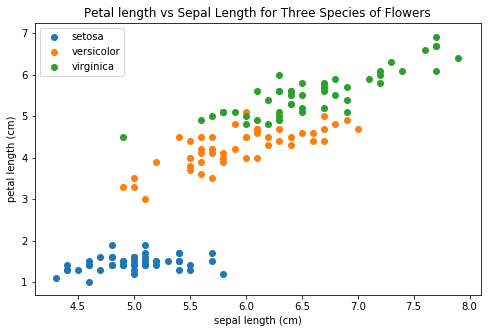

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

# Iterate through each type of flower and plot them using different colors
for flower in df_iris['target'].unique():
    subset_df = df_iris[df_iris['target'] == flower]
    x = subset_df['sepal length (cm)']
    y = subset_df['petal length (cm)']
    
    ax.scatter(x, y, label=data['target_names'][flower])

# Label your axes!
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_title('Petal length vs Sepal Length for Three Species of Flowers')
ax.legend();

What information in this graph jumps out to you?

In your **presentation decks**, you will no doubt be tempted to print out the head of a data frame, take a screen shot, and plop it in the middle of a slide.  We all have that instinct; the dataframe object will become one your most cherished objects. If you put them in your deck, you will no doubt hear one of us gently request its replacement with some other figure.

## The Effectiveness of Visualizations

- People are **highly visual** and can synthesize visual information such more quickly than rows and columns of numbers 
- **Precognitive** understanding of the data
- Visual representations can be much more **viscerally persuasive**

## What Makes an Effective Visualization?

- Each graph should have a **clear poin**t it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your **audience**! Come up with a use case and audience to pitch your visualizations

- Choosing the correct graph for the **relationship** you are trying to communicate

- **Label** your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
     - **Red** and Down tends to be negative while **Green** and Up is positive
     - **Lighter hues** are seen as lower values and darker is higher values
     - Axis start at **zero**
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct

## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
        - Changing the axis scale
        - Using two different y axis scales to compare trends
        - Showing cumulative data which will always be increasing to hide a downturn in a trend
        - Pie charts (comparing degrees is not something people are good at) just use a bar chart
        - Inconsistent units
        - Not showing all of the data for motivated reasons
        - Percentages not adding up to 100

<img src="../../static/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/

_____



<img src="../../static/usa-today-2.png">

# Matplotlib

The matplotlib library will be our foundational visualization tool. Mastering it will allow you to create beautiful graphs quickly.  We can then include these graphs in our README's, final notebooks, and presentation decks. 

<img src="../../static/matplotlib_anatomy.png">

Explanation of non-obvious terms

__Figure__ - This is the sheet of paper all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

# Common Charts and Their Uses

# Scatter Plots

Scatter plots are also very common.  They allow one to visualize the relationship of two variables. 

In the plots below, we see different correlations between variables:



Let's import some NBA data, and use the matplotlib scatter plot to look at correlations.

In [6]:
import sys
import os
sys.path.append(os.path.join(os.pardir, os.pardir))
from src.data_import import player_salaries

### Is there a correlation between career points/game and average career salary?


Isolate the data arrays

In [7]:
import numpy as np
pts_v_salary = player_salaries.groupby('_id').aggregate(np.mean)[['career_PTS', 'salary']]

# We need to pass in array like objects to our plot
avg_pts = pts_v_salary['career_PTS']
avg_salary = pts_v_salary['salary']

Plot the data

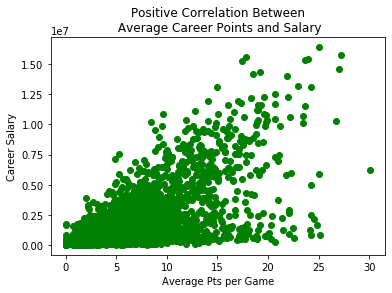

In [9]:
plt.scatter(avg_pts, avg_salary, c='green')
plt.xlabel('Average Pts per Game')
plt.ylabel('Career Salary')
plt.title('Positive Correlation Between\n Average Career Points and Salary');

Error Message

ValueError: x and y must be the same size

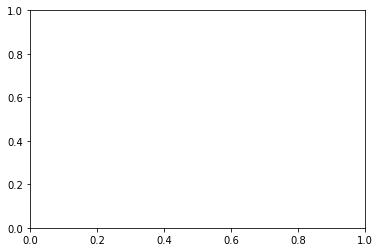

In [10]:
avg_pts_shorter = pts_v_salary['career_PTS'][1:]
plt.scatter(avg_pts_shorter, avg_salary)

# The error reads x ad y must be the same size.  Each array has to be of the same length, since each point has to have both and x and y position. 

Of the three students below, someone volunteer to read and interpret the error message.

1.

2.

3.

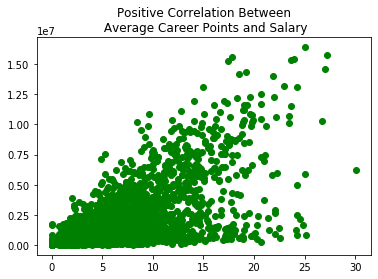

In [11]:

plt.scatter(avg_pts, avg_salary, c='green')
plt.title('Positive Correlation Between\n Average Career Points and Salary');

As we move into modeling, we will begin talking about the relationship of a target variable and a feature.  If we are predicting salary using a linear model, seeing strong positive correlation suggests that Points Per Game may be an important feature to include in our model.

# Pair Program: Let's explore the data and visualize a negative correlation

### Is there a correlation between height and career assists?

Take 7 minutes to plot the correlation between height and career assists.  The arrays are coded below.

Get through as many of the tasks below as possible:

  1. Plot a scatter plot visualizing the correlation of career assists and height.
  2. Add an xlabel, ylabel, and title
  3. Change the color to red
  4. change the marker type to a '^'
  5. Set the opacity to .2
  6. Set the size of each marker to individual_players['salary']/20000
  7. Using an f-string, add the magnitude of correlation to the plot. 
  Code for correlation: `round(np.corrcoef(height, career_assists)[0,1], 4)`

Remember you can view the documentation of scatter by placing your cursor between the parens and hitting shift-tab

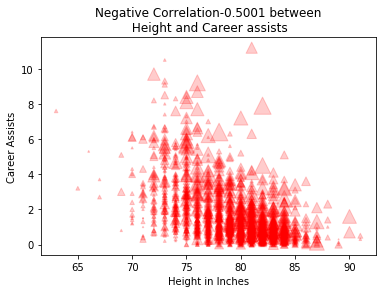

In [13]:
individual_players = player_salaries.drop_duplicates('_id')

height = individual_players['height_inches']
career_assists = individual_players['career_AST']

plt.scatter(height, career_assists, c='red', marker='^', alpha=.2, s=individual_players['salary']/20000)
plt.xlabel('Height in Inches')
plt.ylabel('Career Assists')
plt.title(f'Negative Correlation{round(np.corrcoef(height, career_assists)[0,1], 4)} between\n Height and Career assists');

## Line Plot

Tracks the change of a single variable over time.  They are generally better than bar graphs over shorter periods of time.  They will become especially useful when we look into time series.

Here is some code to read in some well worn shampoo sales data over a three year period.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.path.join(os.pardir, os.pardir,'data','sales-of-shampoo-over-a-three-ye.csv')
shampoo = pd.read_csv(path)[:-1]

shampoo.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


Text(0, 0.5, 'Total Sales')

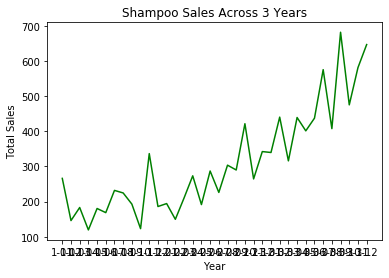

In [15]:
dates = shampoo.Month
sales = shampoo.iloc[:,1]

plt.plot(dates, sales, color='g')
plt.title('Shampoo Sales Across 3 Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')

The above plot shows an upward trend of sales across the years, and perhaps we can also see an increase in variance as well.

That is a clear takeaway, but the x-axis is very messy.  

Let's fix that together. 

Here is the relevant [documentation](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html) to learn how to rotate xticks.

 That is still messy.  Let's reduce the number of ticks. To do so, we indicate which indices to include ticks and pass those indices to plt.xticks()

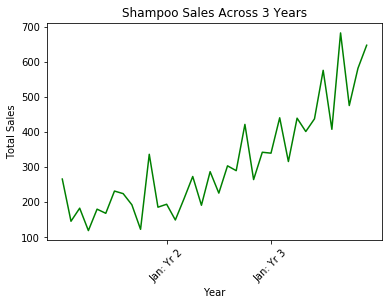

In [20]:
# Update the code below to rotate the xticks

plt.plot(shampoo.Month, shampoo.iloc[:,1], color='g')
plt.title('Shampoo Sales Across 3 Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks([12,24], ['Jan: Yr 2', 'Jan: Yr 3'], rotation=45);

## Plotting Syntax

Above, we used the plt.scatter()/plt.plot() syntax to make our graphs.  That was to ease us into a general comfort with matplotlib.  But there is a better way.

- There are many different ways to create plots but we will strongly suggest using the subplots method  
```fig, ax = plt.subplots()```  
```fig, (ax_1, ax_2) = plt.subplots(1,2)```

    - This is useful for extensibility 
    - Gives you access to the figure and individual axis in a plot
    - More fine grained control of customizing your plot
    - Easily create additional axis on your figure
    - This syntax is a good level of abstraction
        - You can go deeper into the api but this should give you immediate access to most tools you will need for whatever plot you are making
    - Flatiron Specific
        - Plotting code will be more easily readable for other students and instructors
        - You don’t need to remember many different ways to organize your code

Here are links to the [matplotlib documentation](https://matplotlib.org/index.html) as well as the [Axes object documentation](https://matplotlib.org/api/axes_api.html):



From now on, I will use the plt.subplots() syntax, beginning with our barplots.

## Bar charts

Bar charts are everywhere: powerpoints, billboards and the evening news. They are used to show the relationship of a numerical and a categorical variable.

For example, a bar chart can show the growth of a single categorical variable across time.

Let's sum the sales by month over the three years, and see if there is any monthly seasonality.


In [ ]:
# Year and months are in an odd format in this shampoo dataset.  
# Use custom functions to extract data

def get_year(date):
    return date[0]

shampoo['year'] = shampoo['Month'].apply(get_year)
total_sales_per_year = shampoo.groupby('year').sum()[:-1]

def get_month(date):
    return date[2:]

shampoo['month'] = shampoo['Month'].apply(get_month)
total_sales_per_month = shampoo.groupby('month').sum()

sales_per_month = list(total_sales_per_month.values.flatten())
month_numbers = total_sales_per_month.index

months_labels = ['January', 'February', 'March', 'April', 
         'May', 'June', 'July', 'August', 'September', 
         'October', 'November', 'December']
total_sales_per_month

Text(0, 0.5, 'Month')

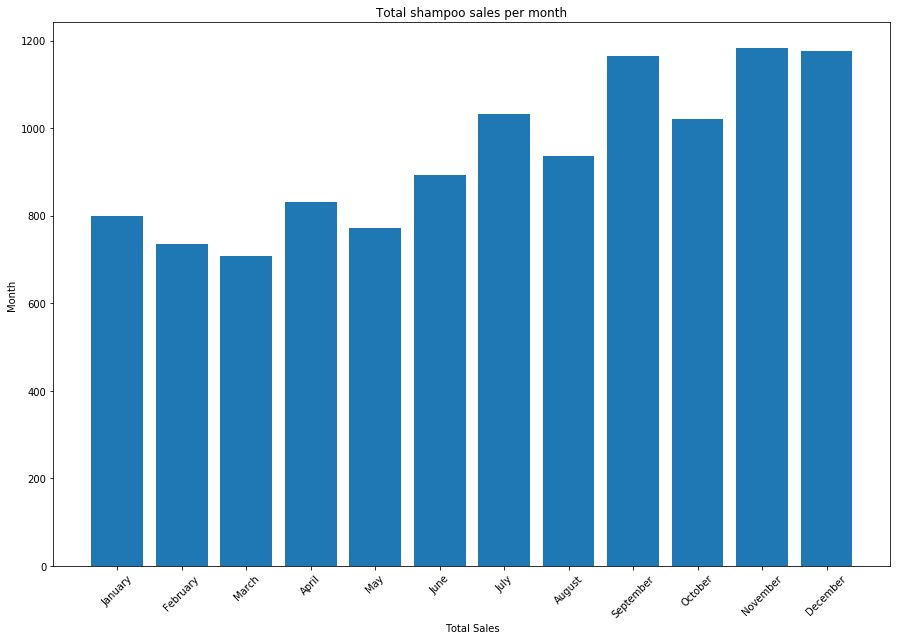

In [26]:
fig, ax = plt.subplots(figsize=[15,10])


ax.bar(x = month_numbers , height=sales_per_month)

ax.set_xticklabels(labels=months_labels, rotation=45)
ax.set_title('Total shampoo sales per month')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Month')


## Histograms

We will get get further into histograms in phase 2, but it is good to get familiar with them sooner rather than later. 

Histograms create uniform bins across the entire range of a continuous variable. They then count the number of data points which fall into each bin.  

Histograms are often confused with bar charts, since they look somewhat similar.  The big difference, however, is that histograms visualize the distribution of a continuous variable, rather than the discrete variable shown by barcharts. You can remember this because the bins of histograms don't have spaces between them.



![histogram_ex](../../static/histogram_example.svg)

Let's import some data from Divy Bikes, the bike sharing company currently in use in Chicago.

![images](../../static/divy.jpeg)

In [ ]:
from src.data_import import prep_divy
divy_trips = prep_divy()

In [ ]:
divy_trips.head()

Can we see a visual difference in hourly ride count distributions between weekdays and weekends?


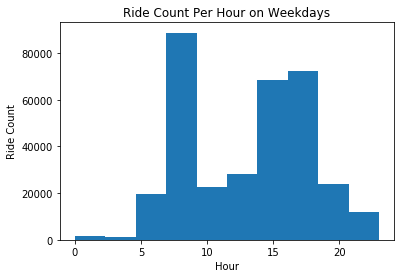

In [48]:
weekday_divy = divy_trips[(divy_trips.weekday != 6) & (divy_trips.weekday != 7)]
fig, ax = plt.subplots()
ax.hist(weekday_divy['hour'])
ax.set_xlabel('Hour')
ax.set_ylabel('Ride Count')
ax.set_title('Ride Count Per Hour on Weekdays');

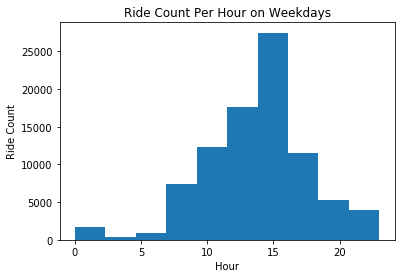

In [56]:
weekend_divy = divy_trips[(divy_trips.weekday == 6) |(divy_trips.weekday == 7)]
fig, ax = plt.subplots()
ax.hist(weekend_divy['hour'])
ax.set_xlabel('Hour')
ax.set_ylabel('Ride Count')
ax.set_title('Ride Count Per Hour on Weekdays');

Let's use the plt.subplots() method to plot the weekdays and weekends side by side.

# Student Screen Share

Let's use the plt.subplots() method to plot the weekday and weekend histograms side by side.

I will ask for a volunteer to share their screen, and we will help them through.

Here is some starter code

`fig, (<fill_in>) = plt.subplots(<fill_in>, figsize=[10,5], sharey=<fill_in>)`
`


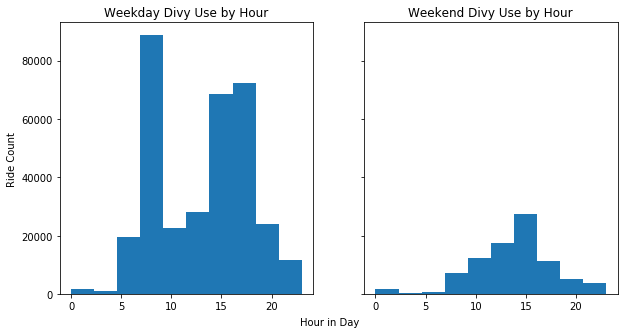

In [57]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize=[10,5], sharey=True, sharex=True)

ax1.hist(weekday_divy['hour'])
ax1.set_title('Weekday Divy Use by Hour')
ax1.set_ylabel('Ride Count')
ax2.hist(weekend_divy['hour'])
ax2.set_title('Weekend Divy Use by Hour')
fig.text(0.5, 0.04, 'Hour in Day', ha='center');

## Layering

![cake](https://media.giphy.com/media/XMgCFjsCSARxK/giphy.gif)

If we want to add multiple plots on one axis, we can simply call the plotting functions one after the other. 

Let's set the **density** parameter to True, set **label** on each plot and call the legend, and set the opacity (**alpha**) to .5 so we can see the layering.

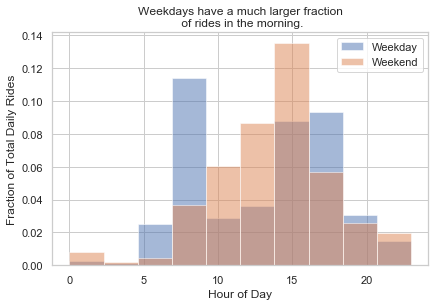

In [74]:
fig, ax = plt.subplots()
ax.hist(weekday_divy['hour'], alpha=.5, density=True, label='Weekday')
ax.hist(weekend_divy['hour'], alpha=.5, density=True, label='Weekend')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Fraction of Total Daily Rides')
ax.set_title('Weekdays have a much larger fraction\n of rides in the morning.')
ax.legend();

### Quick note: style sheets are cool

Find another style from the Docs and set the style. Once you've set the style try rerunning older graphs:

[Style Sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

In [ ]:
style = 'fivethirtyeight'
plt.style.use(style)

## Saving your figures

Let's split the shampoo sales into years, and plot three line plots, one on top of the other

In [ ]:
fig, ax = plt.subplots()
for group in shampoo.groupby('year').groups:
    x = shampoo.groupby('year').get_group(group)
    ax.plot(x.month, x.iloc[:,1], )
    
ax.legend(['year_1', 'year_2', 'year_3'])
ax.set_xlabel('Month')
ax.set_ylabel('Shampoo Sales')
plt.show()
# plt.savefig('path_to_figure_folder/.svg')

# Seaborn

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
# The `style` parameter can be set equal to
# 'white', 'dark', 'whitegrid', 'darkgrid', or
# 'ticks'

sns.set(style='whitegrid')
fig, ax = plt.subplots()

X = height
y = career_assists
sns.scatterplot(X, y, ax=ax);

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.scatterplot(X, y, ax=ax[0])
sns.regplot(X, y, ax=ax[1]);

## Box and Violin Plots

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.distplot(weekday_divy.hour, ax=ax[0][0])
sns.boxplot(weekday_divy.hour, ax=ax[1][0])
sns.distplot(weekend_divy.hour, ax=ax[0][1])
sns.boxplot(weekend_divy.hour, ax=ax[1][1])
sns.distplot(weekend_divy.hour, ax=ax[0][2])
sns.violinplot(weekend_divy.hour, ax=ax[1][2]);

In [ ]:
basketball_corr = individual_players[['salary', 'height_inches', 'career_AST', 'career_FG3%']]

In [ ]:
# Pair plot
sns.pairplot(basketball_corr);

In [ ]:
basketball_corr.corr()